## INFO659-Introduction to Data Analytics  
## Group 8 - Final Project
## Regression Model to predict  weekly sales

### Team Members
Amit Nijsure 

Anusha Narayanan  

Manisha Nandawadekar

Siva Prasath C S

### Contents

* Introduction and Problem Statement

*  Data Sources 

* Data Preparation, Exploration, Cleansing, Transformation and Visualization 

* Methodology

* Modelling and Results

* Evaluation

* Major Challenges and Solutions

* Conclusion and Future Work



### Introduction and Problem Statement

Businesses are often at crossroads with crucial decisions that need to be
implemented rapidly and the outcomes of these decisions will determine whether a
business will live to see another day or will resurface from tremendous losses and fly high
again with profits. Businesses always run the risk of unnecessary stock pile up or keeping
stocks at low level which ultimately has an adverse effect on the revenue. Producers and
shopkeepers face tremendous difficulties in determining the factors that affect the market
sales and end up suffering losses due to bad decision making. Some of these factors that
are proven to affect sales are unexpected weather conditions, holidays, commodity price
inflation, natural calamities, and less footfalls. For example, an owner of a car repair depot
would stock up on car parts expecting a rise in customer service requests after the
Christmas Holidays but the hurricane forces a people to stay at home thus, affecting the
owner’s overall business. It is necessary to come up with a prediction model to overcome
this problem, which can take these factors into account and provide sales prediction given
a certain set of factors.



### Data Source 

#### Data Source Link:https://www.kaggle.com/aditya6196/retail-analysis-with-walmart-data
In this project, we will be using Kaggle’s Walmart Store Sales Data and try to find a
correlation between a potential factor that could affect sales and actual sales. These
correlations will then be merged to form a decision making or a supervised machine
learning model that predicts the amount of sales based on certain set of factor values.
Thus, the Weekly Sales will be the numeric variable that needs to be predicted based on
predictor variables such as weather conditions, fuel prices, consumer price index and
unemployment levels.



### Data Preparation, Exploration, Cleansing, Transformation and Visualization

#### Importing all the required packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.tools as tls
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from imblearn.over_sampling import SMOTE
import datetime
import warnings
warnings.filterwarnings('ignore')

#### Loading csv file data into pandas dataframe named sales_data

In [3]:
sales_data = pd.read_csv('Walmart_Store_sales.csv')
sales_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


#### Checking for any Null values present in any column

In [4]:
sales_data.isnull().any()

Store           False
Date            False
Weekly_Sales    False
Holiday_Flag    False
Temperature     False
Fuel_Price      False
CPI             False
Unemployment    False
dtype: bool

#### Checking the data types of attributes

In [5]:
sales_data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

#### Describe function is used to find the Descriptive statistics and central tendency, dispersion and shape of a data distribution, ignoring ``NaN`` values if any present.

In [6]:
sales_data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


#### Print a brief summary of a DataFrame includes index dtype and column dtypes, non-null values and memory usage.

In [7]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


#### There are sales data available for 45 stores of Walmart in Kaggle. This is the data that covers sales from 2010-02-05 to 2012-11-01.

#### The data contains these features:

* Store - the store number\
* Date - the week of sales\
* Weekly_Sales - sales for the given store\
* Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week\
* Temperature - Temperature on the day of sale\
* Fuel_Price - Cost of fuel in the region\
* CPI – Prevailing consumer price index\
* Unemployment - Prevailing unemployment rate

#### Conversion of Date datatype from object to datetime 

In [8]:
sales_data_df = sales_data.copy()
sales_data_df['Date']= pd.to_datetime(sales_data_df['Date'])

#### Creating new attributes Month and Year from Date attribute

In [9]:
sales_data_df['Month']=pd.DatetimeIndex(sales_data_df['Date']).month
sales_data_df['Year']=pd.DatetimeIndex(sales_data_df['Date']).year

In [10]:
#Attributes datatypes
sales_data_df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Month                    int64
Year                     int64
dtype: object

In [11]:
#Descriptive statistics of data
sales_data_df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,6.475524,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,3.321797,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,12.000000,2012.000000


#### Prints the top 5 rows of the dataframe

In [12]:
sales_data_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010


#### Univariant Distribution of attributes are ploted as below for both continuous and discrete attributes

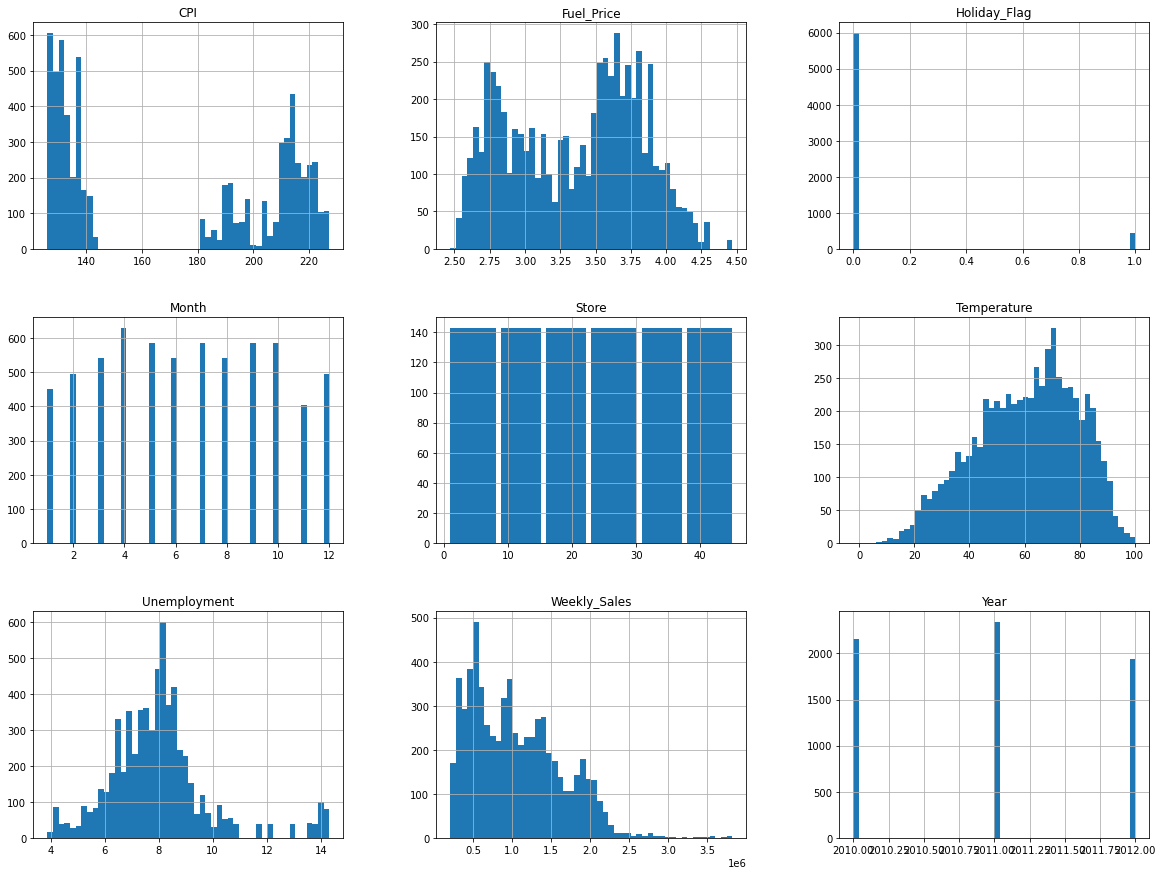

In [13]:
sales_data_df.hist(bins=50, figsize=(20,15))
plt.show()

* CPI feature looks bimodal distribution with most of the data lies between 126 to 143 around and no data lies in 143 to 180 range and even for after 180 we have data distribution but frequency is less when compared to range of 126 to 143 cpi values. 

* Fuel Price attribute looks clear bimodal distribution with two peaks one is at 2.75 and other is at 3.67 

*  Holiday Flag has discrete values of 0 and 1 where 0 represents weekday and 1 represents holiday. Most of the data list for weekdays when compared to holidays

* Month attribute has only discrete values from 1 to 12 where 4th month i.e., April has most frequency and 11th month i.e., Nov has least frequency in data

* Store attribute is discrete with 40 values and it distributed uniformly as all store id frequencies are same.

* Temperature attribute is continuous and slightly negatively skewed with 70F peak temp frequency

* Unemployment attribute is unimodal with the most frequent value around 8.3

* Weekly_sales is right skewed where most of the data lies between 209986 to 250000 and afterwards the variable seems to have outliers.

* Year attribute is discrete with 3 values 2010,2011 and 2012 where 2011 has most data and 2012 has least values

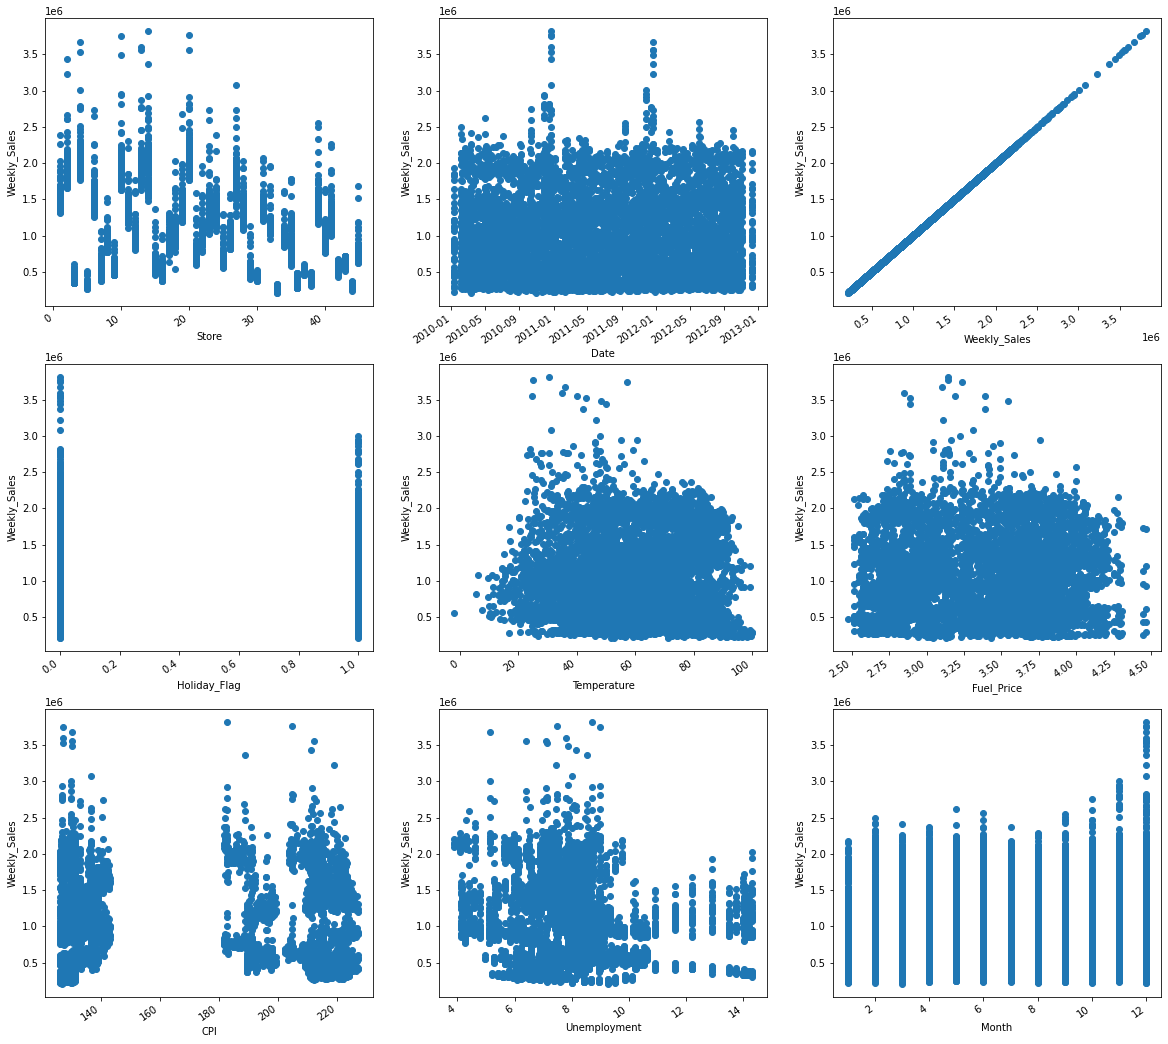

In [14]:
columns=sales_data_df.columns
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
for i in range(0, 3):
    for j in range(0, 3):
        axes[i, j].scatter(sales_data_df[columns[i*3+j]], sales_data_df['Weekly_Sales'])
        axes[i, j].set_xlabel(columns[i*3+j])
        axes[i, j].set_ylabel('Weekly_Sales')
        plt.setp(axes[i,j].get_xticklabels(), rotation=35, horizontalalignment='right')

* If we notice in Weekly sales vs store plot the store id's from 0-30 have good weekly sales compared to remaining store ids.

* From Weekly sales vs Date plot we noticed that weekly sales is similar for all years except for two weeks which are in 2010 and 2011 christmas month.

* From Weekly sales vs Holiday flag plot we can see that non-holidays has more weekly sales than holidays

* From Temperature scatter plot when temp is below 20F sales are too less and there is good amount of sales between 20-60F range

* It looks like Fuel price and CPI feature are less correlated with weekly sales as it seems they are not effecting much.

* when Unemployment rate is high the weekly are less, like after unemployment rate crosses 10 the sales got reduced

* From Month and Weekly sales plot we see like in Nov and Dec months weekly sales are high compared to other months because of festivals(Thanksgiving and Christmas)

#### Below is the plot shows which store id has most and least weekly sales

In [15]:
plt.figure(figsize=(20,12))
# Sum Weekly_Sales for each store, then sorted by total sales
total_sales_for_each_store = sales_data_df.groupby('Store')['Weekly_Sales'].sum().sort_values() 
total_sales_for_each_store_array = np.array(total_sales_for_each_store) # convert to array

# Assigning a specific color for the stores have the lowest and highest sales
clrs = ['lightsteelblue' if ((x < max(total_sales_for_each_store_array)) and (x > min(total_sales_for_each_store_array))) else 'midnightblue' for x in total_sales_for_each_store_array]


ax = total_sales_for_each_store.plot(kind='bar',color=clrs);
# store have minimum sales
p = ax.patches[0]
print(type(p.get_height()))
ax.annotate("The store has minimum sales is 33 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.17, 0.32), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


# store have maximum sales 
p = ax.patches[44]
ax.annotate("The store has maximum sales is 20 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.82, 0.98), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


# plot properties
plt.xticks(rotation=90)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales')

<class 'numpy.float64'>


Text(0, 0.5, 'Total Sales')

#### Below is the plot shows which month has most and least weekly sales

In [16]:
plt.figure(figsize=(20,12))
# Sum Weekly_Sales for each month, then sorted by total sales
total_sales_for_each_month = sales_data_df.groupby('Month')['Weekly_Sales'].sum().sort_values() 
total_sales_for_each_month_array = np.array(total_sales_for_each_month) # convert to array

# Assigning a specific color for the months have the lowest and highest sales
clrs = ['lightsteelblue' if ((x < max(total_sales_for_each_month_array)) and (x > min(total_sales_for_each_month_array))) else 'midnightblue' for x in total_sales_for_each_month_array]


ax = total_sales_for_each_month.plot(kind='bar',color=clrs);

# month have minimum sales
p = ax.patches[0]
print(type(p.get_height()))
ax.annotate("The month has minimum sales is 1 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.17, 0.9), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


# Month have maximum sales 
p = ax.patches[11]
ax.annotate("The month has maximum sales is 4 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.82, 0.98), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


# plot properties
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for each Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')

<class 'numpy.float64'>


Text(0, 0.5, 'Total Sales')

In [17]:
plt.figure(figsize=(20,12))
# Sum Weekly_Sales for each store, then sorted by total sales
total_sales_for_each_year = sales_data_df.groupby('Year')['Weekly_Sales'].sum().sort_values() 
total_sales_for_each_year_array = np.array(total_sales_for_each_year) # convert to array

# Assigning a specific color for the year have the lowest and highest sales
clrs = ['lightsteelblue' if ((x < max(total_sales_for_each_year_array)) and (x > min(total_sales_for_each_year_array))) else 'midnightblue' for x in total_sales_for_each_year_array]


ax = total_sales_for_each_year.plot(kind='bar',color=clrs);

# year have minimum sales
p = ax.patches[0]
print(type(p.get_height()))
ax.annotate("The year which has minimum sales is 2012 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.17, 0.85), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


# year have maximum sales 
p = ax.patches[2]
ax.annotate("The year which has maximum sales is 2011 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.82, 0.98), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


# plot properties
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for every year')
plt.xlabel('Year')
plt.ylabel('Total Sales')

<class 'numpy.float64'>


Text(0, 0.5, 'Total Sales')

#### We can observe that from above plot that walmart had maximum total sales in 2011 and least tatal sales in 2012

['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

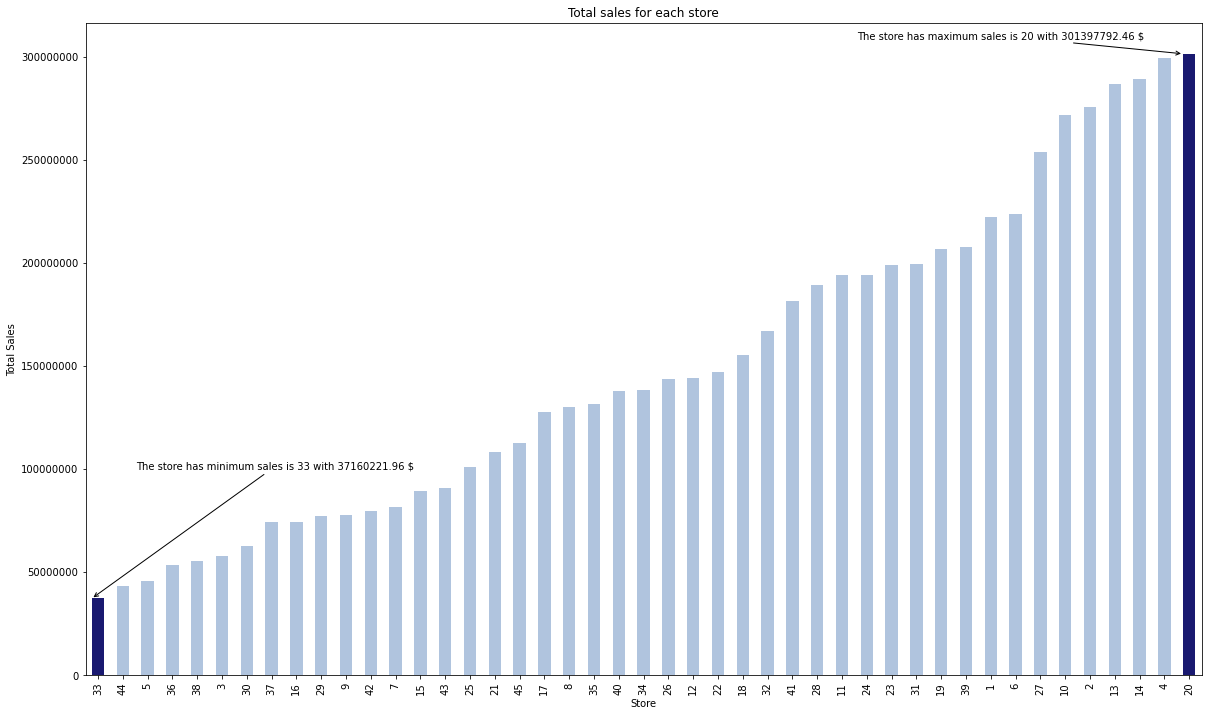

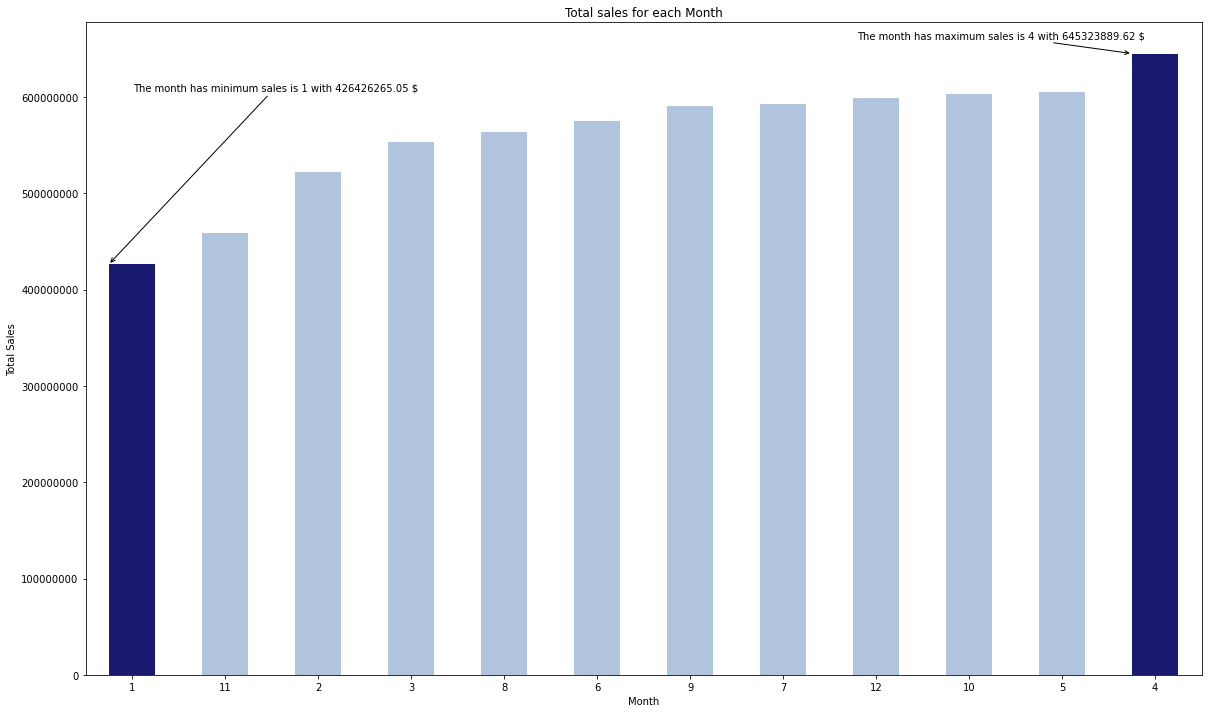

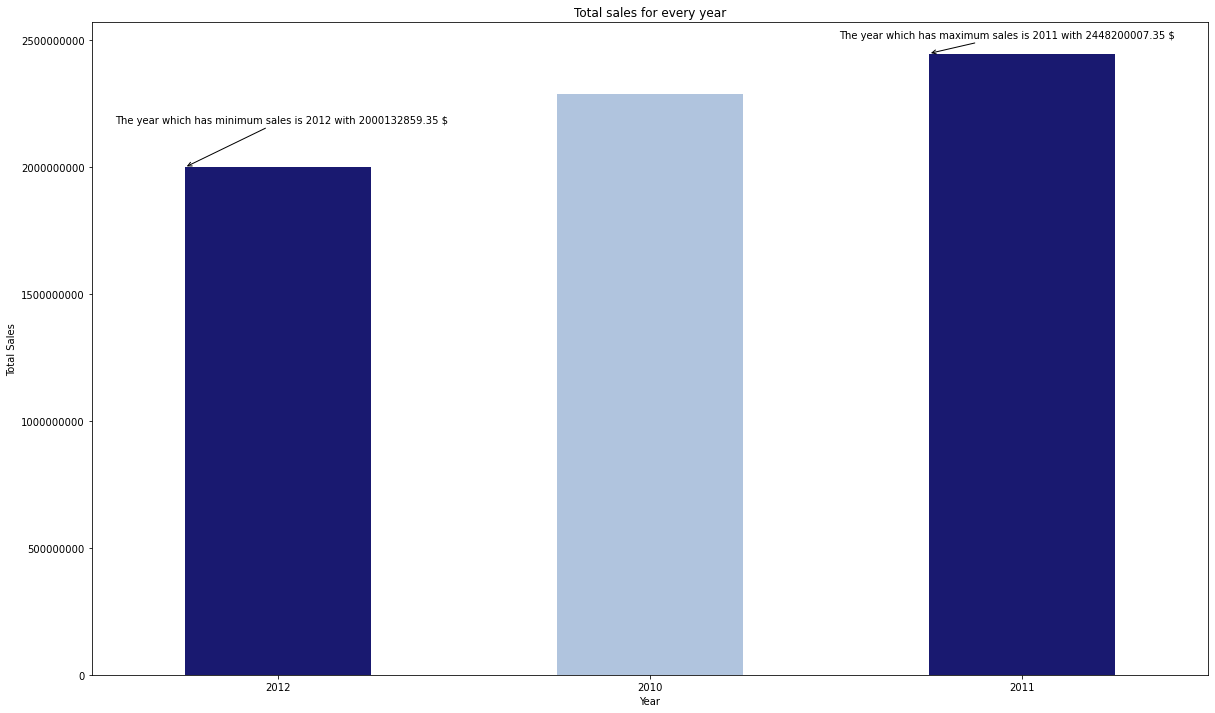

In [18]:
corr_columns =['Weekly_Sales', 'Temperature','Fuel_Price', 'CPI', 'Unemployment']
corr_columns

#### Plots the pairwise relationships in a data attributes.

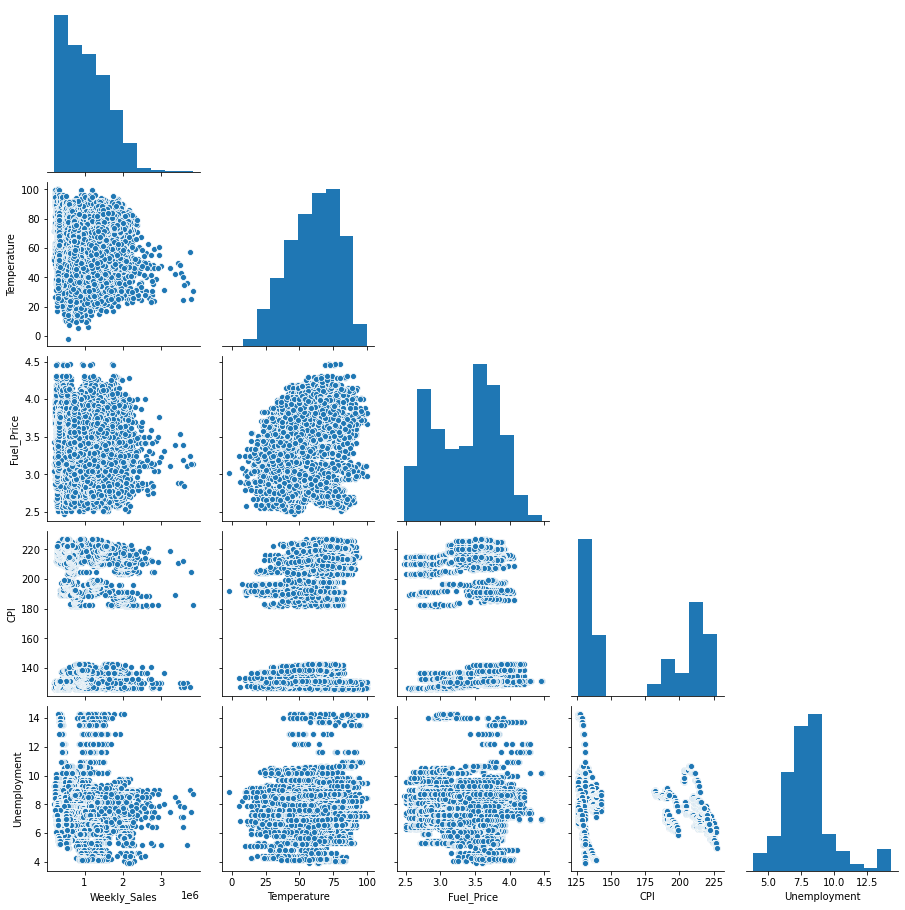

In [19]:
sns.pairplot(sales_data_df[corr_columns],corner=True)

#### Below Heatmap plots the rectangular data as a color-encoded matrix with different color density range to which represent the correlation values

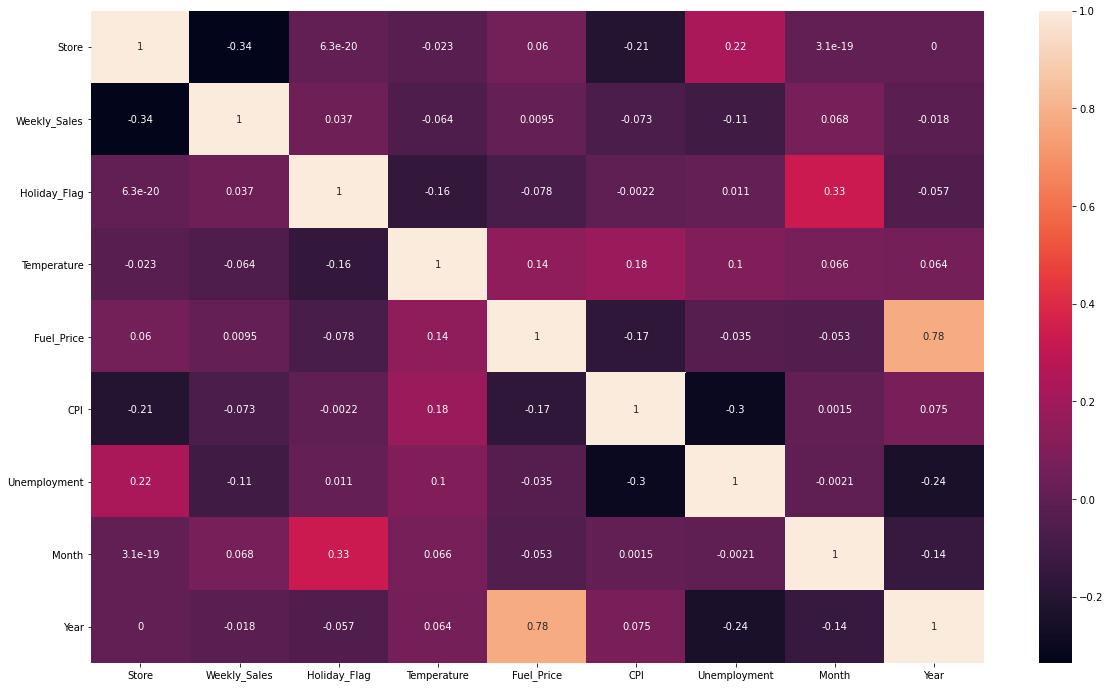

In [20]:
plt.figure(figsize=(20,12))
correlation_df= sales_data_df.corr()
ax = sns.heatmap(correlation_df,annot=True)
plt.show()

### Outlier Detection and Removal

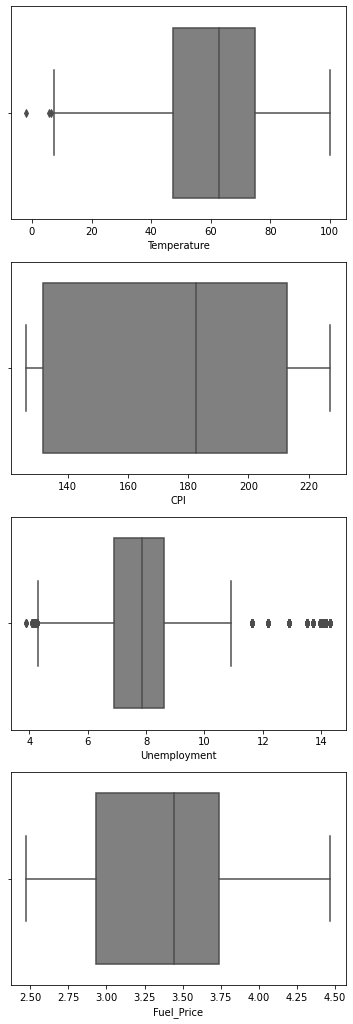

In [21]:
fig, axes = plt.subplots(4, figsize=(6, 18))
x = sales_data_df[['Temperature', 'CPI', 'Unemployment', 'Fuel_Price']]
for i, col in enumerate(x):
  sns.boxplot(sales_data_df[col], ax=axes[i], color="grey")

#### Looks like we have some outliers that can confuse the regression model. We will get rid of them.

In [22]:
sales_data_df = sales_data_df[(sales_data_df['Temperature']>10) & (sales_data_df['Unemployment']<10) & (sales_data_df['Unemployment']>4.5)]

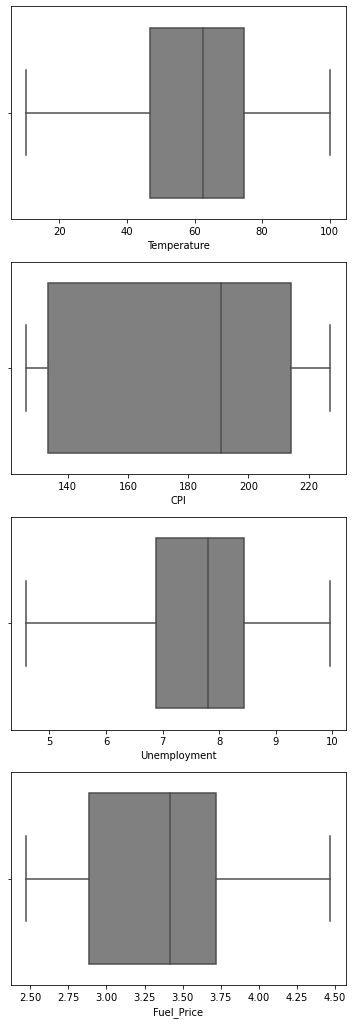

In [23]:
fig, axes = plt.subplots(4, figsize=(6, 18))
x = sales_data_df[['Temperature', 'CPI', 'Unemployment', 'Fuel_Price']]
for i, col in enumerate(x):
  sns.boxplot(sales_data_df[col], ax=axes[i], color="grey")

### Methodology

#### Importing libraries and dataset

In [24]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [25]:
#Retrieving the dataset
df = pd.read_csv("Walmart_Store_sales.csv")
df.head()
df.Date = pd.to_datetime(df.Date)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


#### Check the data for any missing values. Looks like we do not have any missing values in our dataset.

In [26]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

#### Let us split the dataset into day, month and year and add these new rows to the dataframe

In [27]:
df.insert(2, 'Day', pd.DatetimeIndex(df.Date).day)
df.insert(3, 'Month', pd.DatetimeIndex(df.Date).month)
df.insert(4, 'Year', pd.DatetimeIndex(df.Date).year)
df.head()

,Store,Date,Day,Month,Year,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,2,5,2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,2,12,2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,19,2,2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,26,2,2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,3,5,2010,1554806.68,0,46.50,2.625,211.350143,8.106


### Sales Forecasting Using Different Types of Regression

#### What is Regression?
1.   Regression analysis is the process of estimating the relationship between a dependent or target variable (Weekly Sales in our case) and one or more independent variables (Temperature, CPI, Unemployment Rate, etc. in our case).
2.   The dependent variable is often called the outcome variable and the independent variables are often called predictors, covariates or features.
3.   Some of the main types of regression models are linear regression, polynomial regression, random forest regression (ensemble method that combines outputs of many regression models to produced informed results), logistic regression, lasso regression.

In this project, we will study how different types of regression models produce forecast for the Walmart Sales data.<br><br>

We have already preprocessed data and most of the data is already in its proper format. We need to perform outlier detection and removal, because regression is particularly sensitive to outliers.

### Outlier Detection and Removal

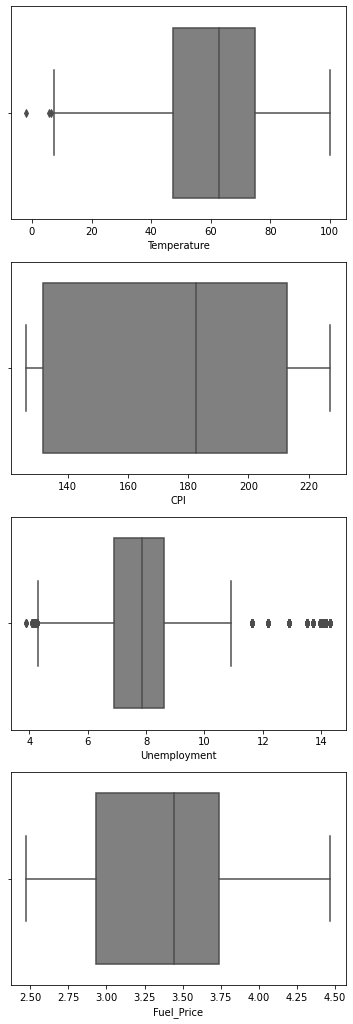

In [28]:
fig, axes = plt.subplots(4, figsize=(6, 18))
x = df[['Temperature', 'CPI', 'Unemployment', 'Fuel_Price']]
for i, col in enumerate(x):
  sns.boxplot(df[col], ax=axes[i], color="grey")

Looks like we have some outliers that can confuse the regression model. We will get rid of them.

In [29]:
df = df[(df['Temperature']>10) & (df['Unemployment']<10) & (df['Unemployment']>4.5)]

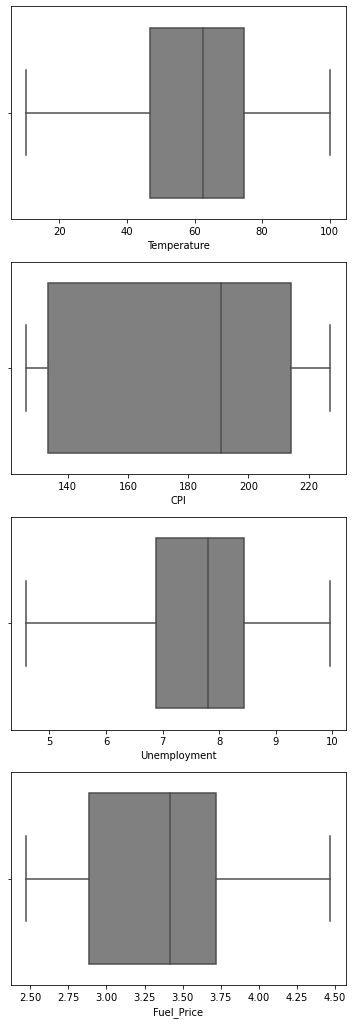

In [30]:
fig, axes = plt.subplots(4, figsize=(6, 18))
x = df[['Temperature', 'CPI', 'Unemployment', 'Fuel_Price']]
for i, col in enumerate(x):
  sns.boxplot(df[col], ax=axes[i], color="grey")

Now that we have eliminated all the outliers we are ready to perform regression modeling using various regression techniques mentioned below - 


1.   Linear Regression
2.   Random Forest Regression
3.   Support Vector Regression
4.   Lasso Regression
5.   KNN Regressor
6.   Decision Tree Regressor
7.   Gradiant Boosting Regressor
8.   Extra Trees Regressor

We will also explore the use of Long Short Term Memory (LSTMs) Neural Networks for time series prediction.


###  Modelling and Results

#### Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [32]:
x = df[["Store","Temperature", "Fuel_Price", "CPI", "Unemployment", "Day", "Month", "Year"]]
y = df["Weekly_Sales"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Accuracy - 14.0%
Mean Absolute Error: 459844.2738218573
Mean Squared Error: 308505999228.4925
Root Mean Squared Error: 555433.1636016096


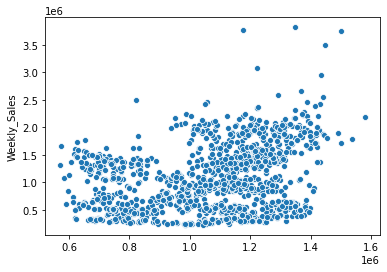

In [33]:
model = LinearRegression()
sc = StandardScaler()
model.fit(sc.fit_transform(x_train), y_train)
y_pred = model.predict(sc.fit_transform(x_test))
print("Accuracy - {}%".format(round(model.score(sc.fit_transform(x_train), y_train)*100), 2))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.scatterplot(y_pred, y_test)

####  Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [35]:
x = df[["Store","Temperature", "Fuel_Price", "CPI", "Unemployment", "Day", "Month", "Year"]]
y = df["Weekly_Sales"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Accuracy - 99.0%
Mean Absolute Error: 137719.55784463775
Mean Squared Error: 68810961654.8589
Root Mean Squared Error: 262318.43559852766


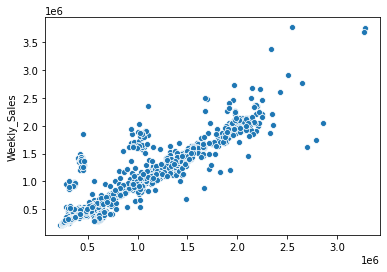

In [36]:
model = RandomForestRegressor(n_estimators=400, max_depth=15, n_jobs=5)
sc = StandardScaler()
model.fit(sc.fit_transform(x_train), y_train)
y_pred = model.predict(sc.fit_transform(x_test))
print("Accuracy - {}%".format(round(model.score(sc.fit_transform(x_train), y_train)*100), 2))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.scatterplot(y_pred, y_test)

We clearly see that accuracy increases substantially after using a Random Forest Regression. The Error Values have also reduced significantly. This seems like a good fit for the data but overfitting might be a problem here. We will limit our accuracy threshold from 91-95%.

#### Support Vector Regression

In [37]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [38]:
x = df[["Temperature", "Fuel_Price", "CPI", "Unemployment"]]
y = df["Weekly_Sales"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Accuracy - -3.0%
Mean Absolute Error: 476108.00967313576
Mean Squared Error: 348197846862.94653
Root Mean Squared Error: 590082.9152440752


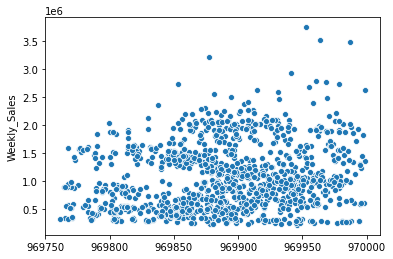

In [39]:
model = SVR('rbf')
sc = StandardScaler()
model.fit(sc.fit_transform(x_train), y_train)
y_pred = model.predict(sc.fit_transform(x_test))
print("Accuracy - {}%".format(round(model.score(sc.fit_transform(x_train), y_train)*100), 2))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.scatterplot(y_pred, y_test)

#### Lasso Regression

In [40]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [41]:
x = df[["Temperature", "Fuel_Price", "CPI", "Unemployment"]]
y = df["Weekly_Sales"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Accuracy - 1.0%
Mean Absolute Error: 497286.8603767859
Mean Squared Error: 344003452308.579
Root Mean Squared Error: 586518.0750058595


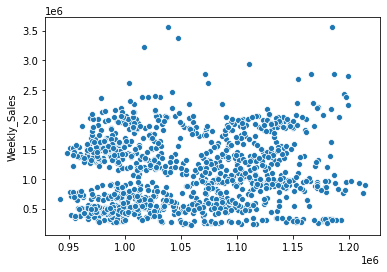

In [42]:
model = Lasso()
sc = StandardScaler()
model.fit(sc.fit_transform(x_train), y_train)
y_pred = model.predict(sc.fit_transform(x_test))
print("Accuracy - {}%".format(round(model.score(sc.fit_transform(x_train), y_train)*100), 2))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.scatterplot(y_pred, y_test)

#### KNN Regressor

In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [44]:
x = df[["Temperature", "Fuel_Price", "CPI", "Unemployment"]]
y = df["Weekly_Sales"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Accuracy - 42.0%
Mean Absolute Error: 442106.530229682
Mean Squared Error: 317314873959.2568
Root Mean Squared Error: 563307.0867291274


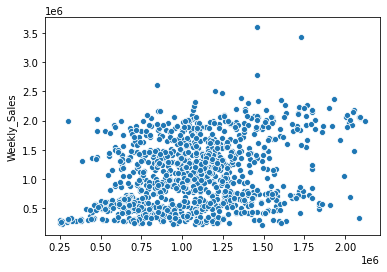

In [45]:
model = KNeighborsRegressor(n_neighbors=4, n_jobs=4)
sc = StandardScaler()
model.fit(sc.fit_transform(x_train), y_train)
y_pred = model.predict(sc.fit_transform(x_test))
print("Accuracy - {}%".format(round(model.score(sc.fit_transform(x_train), y_train)*100), 2))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.scatterplot(y_pred, y_test)

#### Decision Tree Regressor

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [47]:
x = df[["Temperature", "Fuel_Price", "CPI", "Unemployment"]]
y = df["Weekly_Sales"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Accuracy - 86.0%
Mean Absolute Error: 461784.0461012957
Mean Squared Error: 459244389851.5498
Root Mean Squared Error: 677675.7261784945


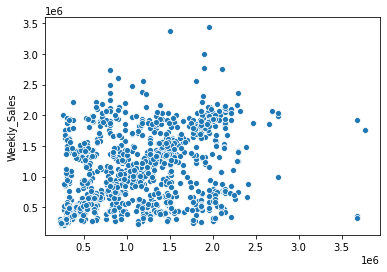

In [48]:
model = DecisionTreeRegressor(criterion='mse', random_state=0)
sc = StandardScaler()
model.fit(sc.fit_transform(x_train), y_train)
y_pred = model.predict(sc.fit_transform(x_test))
print("Accuracy - {}%".format(round(model.score(sc.fit_transform(x_train), y_train)*100), 2))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.scatterplot(y_pred, y_test)

#### Gradiant Boosting *Regressor*

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [50]:
x = df[["Temperature", "Fuel_Price", "CPI", "Unemployment"]]
y = df["Weekly_Sales"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Accuracy - 28.0%
Mean Absolute Error: 436650.0455864234
Mean Squared Error: 282195509293.8492
Root Mean Squared Error: 531220.7726490458


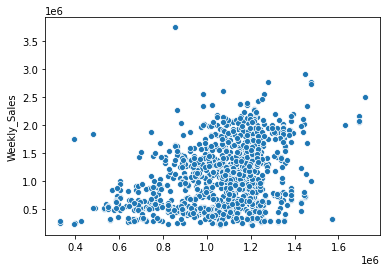

In [51]:
model = GradientBoostingRegressor()
sc = StandardScaler()
model.fit(sc.fit_transform(x_train), y_train)
y_pred = model.predict(sc.fit_transform(x_test))
print("Accuracy - {}%".format(round(model.score(sc.fit_transform(x_train), y_train)*100), 2))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.scatterplot(y_pred, y_test)

#### Extra Trees Regressor

In [52]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [53]:
x = df[["Temperature", "Fuel_Price", "CPI", "Unemployment"]]
y = df["Weekly_Sales"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Accuracy - 86.0%
Mean Absolute Error: 395597.0256530036
Mean Squared Error: 265147318913.83725
Root Mean Squared Error: 514924.57594664994


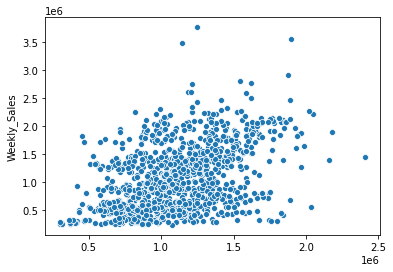

In [54]:
model = ExtraTreesRegressor()
sc = StandardScaler()
model.fit(sc.fit_transform(x_train), y_train)
y_pred = model.predict(sc.fit_transform(x_test))
print("Accuracy - {}%".format(round(model.score(sc.fit_transform(x_train), y_train)*100), 2))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.scatterplot(y_pred, y_test)

#### Multivariate Time Series Forecasting with LSTMs Keras

#### We need to perform store wise prediction here because the time series for each store will be different based on the location and the population of the area where the store is situated. We will start just with store number 1 and eventually can think about performing the same for the other stores as well

In [55]:
df = df.loc[df["Store"] == 1]

Setting the date as index for the data

In [56]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


#### Plotting the graph for each variable


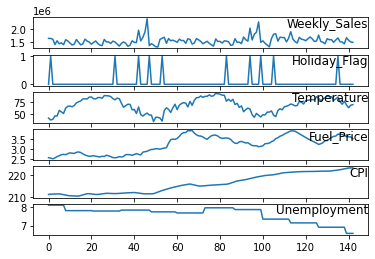

In [57]:
plt.figure()
j = 1
for i, col in enumerate(df.columns[4:]):
  plt.subplot(len(df.columns[4:]), 1, j)
  plt.plot(df.values[:, i+4])
  plt.title(df.columns[i+4], y=0.5, loc='right')
  j += 1
plt.show()

#### The Store, Day, Month and Year are not that useful to us now since we are taking only a single store and the date index, so, we will remove them.

In [58]:
df.pop('Day')
df.pop('Month')
df.pop('Year')
df.pop('Store')

Date
2010-05-02    1
2010-12-02    1
2010-02-19    1
2010-02-26    1
2010-05-03    1
             ..
2012-09-28    1
2012-05-10    1
2012-12-10    1
2012-10-19    1
2012-10-26    1
Name: Store, Length: 143, dtype: int64

#### Let us split the data into train and test

In [59]:
X = df[df.columns[1:5]]
Y = df["Weekly_Sales"]

In [60]:
X_train = X.loc[X.index[:int(len(X.index)*0.8)]]
train_index = X_train.index
X_train = np.array(X_train)
X_test = X.loc[X.index[int(len(X.index)*0.8):]]
test_index = X_test.index
X_test = np.array(X_test)

In [61]:
Y_train = np.array(Y.loc[Y.index[:int(len(Y.index)*0.8)]])
Y_test = np.array(Y.loc[Y.index[int(len(Y.index)*0.8):]])

In [62]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [63]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((114, 1, 4), (114,), (29, 1, 4), (29,))

#### Designing Our Long Short Term Memory (LSTM)

In [64]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [65]:
# Constructing the LSTM
model = Sequential()
model.add(LSTM(50, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                11000     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 11,051
Trainable params: 11,051
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Training the Constructed LSTM
history = model.fit(X_train, Y_train, epochs=100, batch_size=52, validation_data=(X_test, Y_test), verbose=2, shuffle=False)

Epoch 1/100
3/3 - 2s - loss: 1551089.6250 - val_loss: 1571676.7500
Epoch 2/100
3/3 - 0s - loss: 1551089.3750 - val_loss: 1571676.3750
Epoch 3/100
3/3 - 0s - loss: 1551089.1250 - val_loss: 1571676.2500
Epoch 4/100
3/3 - 0s - loss: 1551089.1250 - val_loss: 1571676.0000
Epoch 5/100
3/3 - 0s - loss: 1551088.8750 - val_loss: 1571675.8750
Epoch 6/100
3/3 - 0s - loss: 1551088.7500 - val_loss: 1571675.6250
Epoch 7/100
3/3 - 0s - loss: 1551088.5000 - val_loss: 1571675.2500
Epoch 8/100
3/3 - 0s - loss: 1551088.2500 - val_loss: 1571675.0000
Epoch 9/100
3/3 - 0s - loss: 1551088.1250 - val_loss: 1571674.7500
Epoch 10/100
3/3 - 0s - loss: 1551087.8750 - val_loss: 1571674.7500
Epoch 11/100
3/3 - 0s - loss: 1551087.7500 - val_loss: 1571674.7500
Epoch 12/100
3/3 - 0s - loss: 1551087.6250 - val_loss: 1571674.5000
Epoch 13/100
3/3 - 0s - loss: 1551087.2500 - val_loss: 1571674.3750
Epoch 14/100
3/3 - 0s - loss: 1551087.1250 - val_loss: 1571674.1250
Epoch 15/100
3/3 - 0s - loss: 1551087.0000 - val_loss: 15

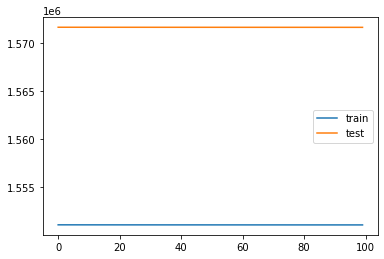

In [68]:
# Plot the training process
plt.plot(history.history["loss"], label='train')
plt.plot(history.history["val_loss"], label='test')
plt.legend()
plt.show()

The LSTM does not reduce the prediction loss as much as the regressors and hence, we cannot use it for forecasting the store sales. The reason for this might be lack of enough data. Neural networks are generall used

### Results

<table border=1><tr> <th> Regression Model </th> <th> Accuracy </th> <th> Mean Absolute Error </th> <th> Mean Square Error </th> <th> Root Mean Square Error </th></tr><tr> <td>Linear Regression</td> <td>13.0%</td><td>455087.83</td><td>297124253184.87</td><td>545091.05</td></tr><tr> <td>Random Forest Regression</td> <td>99.0%</td><td>275602.26</td><td>264256707878.88</td><td>514059.05</td></tr><tr> <td>Support Vector Regression</td> <td>-3.0%</td><td>469081.12</td><td>325194797987.52</td><td>570258.54</td></tr><tr> <td>Lasso Regression</td> <td>1.0%</td><td>496716.28</td><td>342513792864.54</td><td>585246.78</td></tr><tr> <td>KNN Regressor</td> <td>42.0%</td><td>454605.49</td><td>336483553604.94</td><td>580072.02</td></tr><tr> <td>Decision Tree Regressor</td> <td>87.0%</td><td>467212.79</td><td>489386771780.16</td><td>699561.84</td></tr><tr> <td>Gradient Boosting Regression</td> <td>29.0%</td><td>443549.33</td><td>291198191209.33</td><td>539627.83</td></tr><tr> <td>Extra Trees Regression</td><td>86.0%</td><td>393414.16</td><td>271715498280.91</td><td>521263.37</td></tr></table>

LSTM Neural Networks could only get our absolute loss down to 1551085.5000 after 100 epochs, but this result was for just 143 records of a single store. LSTMs are optimized to perform well with large amount of data. This may further improve if sales data for a single store is added, for example, if daily sales data is added.

#### In the current scenario, the ***Random Forest Regressor*** has the best accuracy and the lowest error values. The second best is the ***Decision Tree Regressor*** and the third best is the ***Extra Trees Regressor***.

#### Further Scope
Generally for tasks related to sales prediction and forecasting, Time Series Machine Learning is used on a large scale. An example of such a technique is the ARIMA model which stands for Autoregressive Integrated Moving Average which attempts to explain a time series based on the previously seen values, lags and errors and constructs an equation which can be used to forecast future values. Extensive research needs to be done on how to use ARIMA models for Walmart Sales Data.

### Evaluation:

Our main objective was to predict Weekly_Sales, which is a numeric variable. So, we have used Regression models on our data after exploring the attributes of the dataset. From the Data exploration part, we observed how the attributes are distributed and their relationship with the target variable Weekly_Sales. From the above visualization, it is observed that the variables are mostly independent, and they do not exhibit a good correlation among themselves. So, to train our model we have considered all the attributes (except the date variable) of the dataset as our predictor variables to predict the Weekly_Sales.

After training different regression models with train data and predicting them with test data, we have evaluated our models by using the below evaluation metrics.

* Accuracy 
* Mean Absolute Error 
* Mean Square Error 
* Root Mean Square Error
* Loss (For Time-series Analysis)

From the above evaluation metrics results (Accuracy, Mean absolute error, Mean square error, Root mean square error) of different models, we can see that Random Forest Regression models exhibit good accuracy. But it cannot be considered as a good model because accuracy alone cannot be considered as the suitable evaluation metric as we are performing regression analysis for predicting the weekly sales which is a numeric value and we know that accuracy works best for classification, not the regression. A regression model is considered good when the Mean absolute error, Mean square error, and Root mean square error values are close to zero (<0.5). But when we observe the above evaluation metric, it is clearly shown that no model predicted the weekly_sales with acceptable values. Among these models, random forest regression is having better evaluation metric values followed by Decision Tree Regressor and Extra Trees Regressor respectively. We can also say that the attributes Temperature, CPI, Unemployment, and fuel price are not contributing effectively to the prediction of weekly_sales. When we tried to evaluate the relationship between the attributes Weekly_Sales  and Date to perform time series analysis using LSTM, we observed that time series analysis also resulted in an unsatisfied large loss value for the time series model to work well. This loss should be minimum. But in our case, even the date attribute was also not much helpful in predicting weekly_sales(Note: we analyzed this only for one store, not the entire dataset)results are not as per our expectation.


### Major Challenges and Solution:

When we initially explored the data, we thought the attributes Temperature, CPI, Unemployment, and fuel price night play a major role in Weekly_sales prediction but we faced a challenge while performing the analysis as our independent variable are not having a good relationship with the target variable Weekly_Sales. So, we are not able to identify key attributes and used all the available attributes in our models which resulted in poor results. We faced difficulties in performing time series analysis by utilizing the Date column, which is a major attribute in sales forecasting. We identified the relationship between the independent variable and attributes distribution using the packages available in python libraries. We were also able to successfully use the regression model from these packages. Jupyter notebooks provided us the platform to do our analysis work with ease and we solved most of our challenges in pre-processing, exploration, visualization, model training, predicting, evaluating using python language in Jupyter notebook.


### Conclusion and future work:

While working on this project we examined how data analysis help in solving a business problem in the real world by understanding the relationship between the independent variable and how one attribute can impact the other attribute. We also understood how independent attributes when combined produce valuable information to solve the problem. Even though most of the independent attributes in our data don’t have a good relationship with the target attribute, we were able to use them to analyze those variable impact on the target variable using the regression function. During our analysis, we also understood how training and predicting using machine learning models work, and we also gained knowledge on how we can evaluate our models and decide which is working well and solve our business problem.

In our report we didn’t explore much on time series algorithm which has a great value when comes to sales forecasting. In the future, we would like to explore the date attribute deeply and see how the dates affect the Weekly_Sales and also, we would like to gather more attributes which hold information like stocks, store location, type of the store, etc.., which will have a great impact on the sales.
